In [1]:
from LightPipes import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema

In [2]:
Field=Begin(30*mm, 1*um, 256)
Field = CircAperture(10*mm, 0, 0, Field)
Field = Forvard(3*m, Field)
I = Intensity(0,Field)

In [3]:
x=[]
for i in range(256):
    x.append((-20*mm/2+i*20*mm/256)/mm)

/Users/Manuel/miniconda2/envs/QISKitenv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


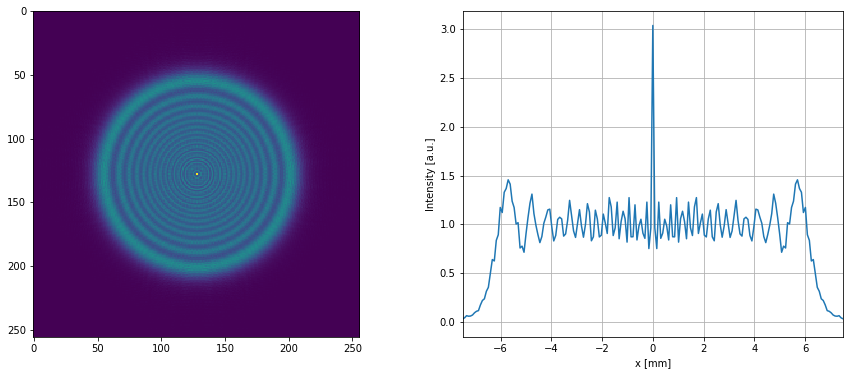

In [4]:
fig=plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(I)#,cmap='rainbow'); ax1.axis('off')
ax2.plot(x,I[128]);ax2.set_xlabel('x [mm]');ax2.set_ylabel('Intensity [a.u.]')
ax2.set_xlim(-7.5,7.5)
ax2.grid('on')
plt.show()

In [5]:
A=I[128][120:256]

In [6]:
np.amax(A)

3.0396560274887157

In [7]:
from scipy.signal import argrelmax, argrelmin
g = argrelmax(np.asarray(A), order=1)
p = argrelmin(np.asarray(A), order=1)

In [8]:
lista = list(g[0])
lista2 = list(p[0])
info = np.zeros(len(A))
info2 = np.zeros(len(A))
for e in lista:
    info[int(e)]=(A[int(e)])
for e in lista2:
    info2[int(e)]=(A[int(e)])


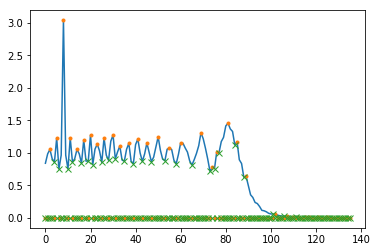

In [9]:
plt.plot(A)
plt.plot(info, '.')
plt.plot(info2, 'x')

In [10]:
#maximos
print(len(info[info!=0]),len(lista), type(info))
print(lista, info[info!=0])

#minimos
print(len(info2[info2!=0]),len(lista2), type(info2))
print(lista2, info2[info2!=0])

34 34 <class 'numpy.ndarray'>
[2, 5, 8, 11, 14, 17, 20, 23, 26, 30, 33, 37, 41, 45, 50, 55, 60, 69, 74, 76, 81, 85, 89, 102, 107, 110, 112, 115, 117, 121, 125, 128, 131, 134] [1.05328498e+00 1.22898675e+00 3.03965603e+00 1.22898675e+00
 1.05328498e+00 1.20102742e+00 1.27465445e+00 1.13513263e+00
 1.22882434e+00 1.27504095e+00 1.10617397e+00 1.14631497e+00
 1.21289975e+00 1.15157379e+00 1.24689726e+00 1.07384871e+00
 1.15697221e+00 1.31088202e+00 7.77688623e-01 1.01827915e+00
 1.45759359e+00 1.17420072e+00 6.40109352e-01 6.45013871e-02
 2.50116855e-02 1.50407362e-02 1.41963926e-02 2.04386185e-02
 9.17040879e-03 1.33982937e-02 6.78224595e-03 2.59931981e-03
 3.22668552e-03 5.23691665e-03]
33 33 <class 'numpy.ndarray'>
[4, 6, 10, 12, 16, 19, 21, 25, 28, 31, 35, 39, 43, 47, 53, 58, 65, 73, 75, 77, 84, 88, 101, 106, 109, 111, 113, 116, 119, 124, 127, 130, 132] [8.57341825e-01 7.52673870e-01 7.52673870e-01 8.57341825e-01
 8.40844872e-01 8.72803293e-01 8.18763092e-01 8.53232639e-01
 8.86220844

In [18]:
difM=[];
difm=[];

for i in range(len(lista)):
    try:
        difM.append(abs(lista[i] - lista[i+1]))
    except:
        pass
    
for i in range(len(lista2)):
    try:
        difm.append(abs(lista2[i] - lista2[i+1]))
    except:
        pass

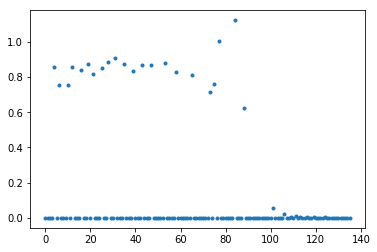

In [11]:
half_sig = info[6:]
half_sig2 = info2
plt.plot(half_sig2,'.')

In [12]:
half_sig = half_sig[half_sig > 0.5]
half_sig2 = half_sig2[half_sig2 < 1.5]

In [24]:
difM= np.asarray(difM)
df2M=difM[difM!=0]
df2M=difM[difM<14]

difm= np.asarray(difm)
df2m=difm[difm!=0]

print('from:', type(difM), np.shape(difM), 'The non-zero values are:')
print(df2M) #w/o zero values
print('from:', type(difm), np.shape(difM), 'The non-zero values are:')
print(df2m) #w/o zero values

from: <class 'numpy.ndarray'> (33,) The non-zero values are:
[ 3  3  3  3  3  3  3  3  4  3  4  4  4  5  5  5  9  5  2  5  4  4 13  5
  3  2  3  2  4  4  3  3  3]
from: <class 'numpy.ndarray'> (33,) The non-zero values are:
[ 2  4  2  4  3  2  4  3  3  4  4  4  4  6  5  7  8  2  2  7  4 13  5  3
  2  2  3  3  5  3  3  2]


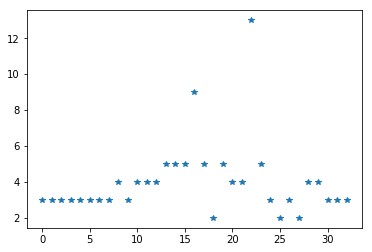

In [15]:
# plt.plot(df2m,'o')
plt.plot(df2M,'*')